In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [39]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_evaluation_returns, plot_grouped_evaluation_returns, plot_min_max_penalty

In [40]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [41]:
# No REx
MP329 = get_results("MP329")
MP330 = get_results("MP330")
MP331 = get_results("MP331")

# REx - 10.0
MP338 = get_results("MP338")
MP339 = get_results("MP339")
MP340 = get_results("MP340")

#################
# Retrain 1 Epoch
#################
# No REx
MP874 = get_results("MP874")
MP875 = get_results("MP875")
MP876 = get_results("MP876")

# REx - 10.0
MP877 = get_results("MP877")
MP878 = get_results("MP878")
MP879 = get_results("MP879")

## Original Log Vars

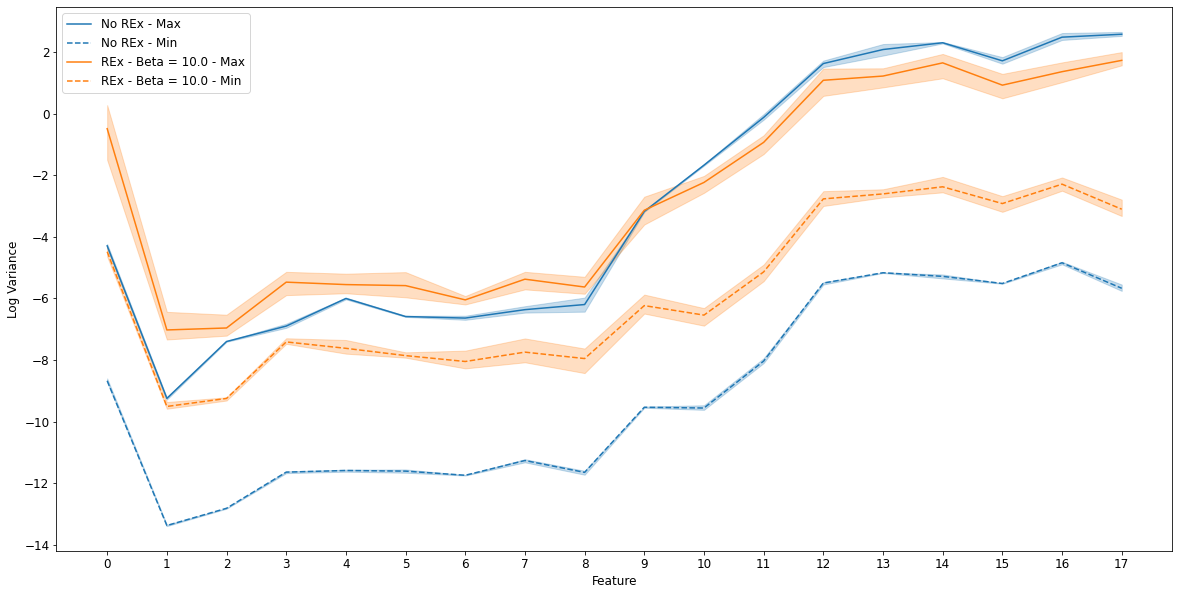

In [42]:
plot_min_max_logvars([
    ((MP329, MP330, MP331), 'No REx'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

## Re-Run Comparison

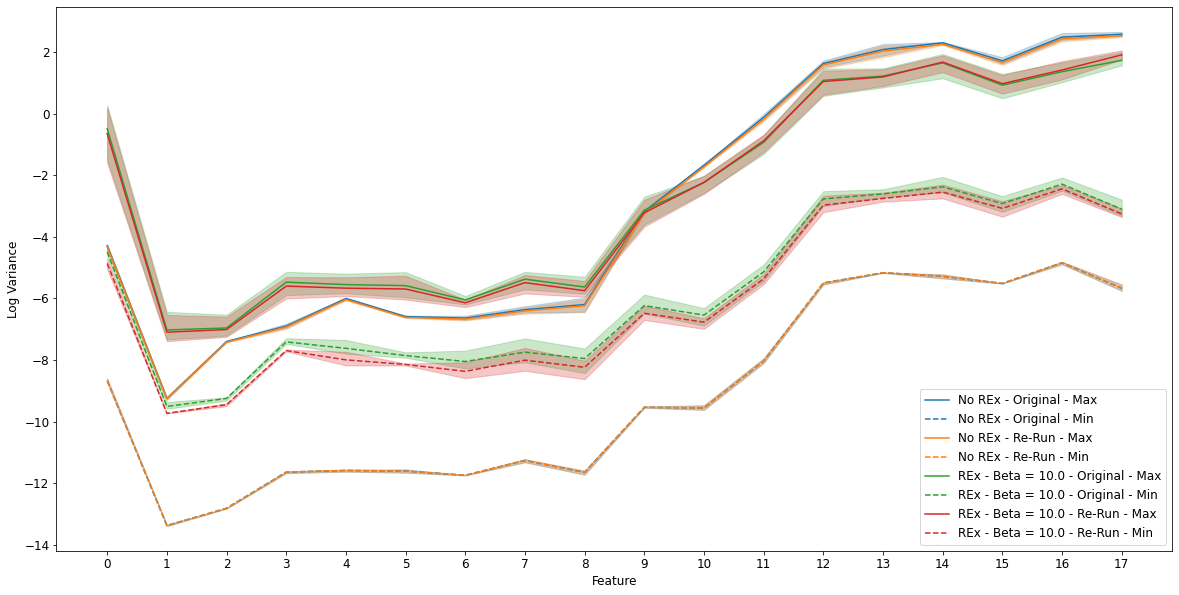

In [43]:
plot_min_max_logvars([
    ((MP329, MP330, MP331), 'No REx - Original'),
    ((MP874, MP875, MP876), 'No REx - Re-Run'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0 - Original'),
    ((MP877, MP878, MP879), 'REx - Beta = 10.0 - Re-Run'),
])

## Change in Min and Max Penalties

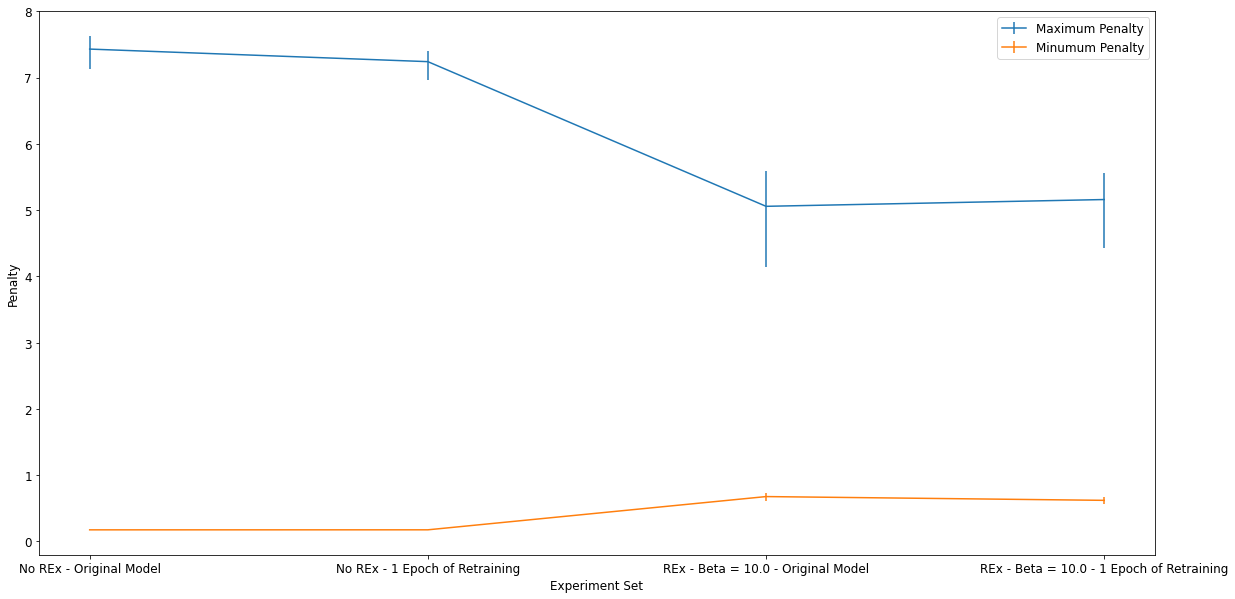

In [44]:
plot_min_max_penalty([
    ((MP329, MP330, MP331), 'No REx - Original Model'),
    ((MP874, MP875, MP876), 'No REx - 1 Epoch of Retraining'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0 - Original Model'),
    ((MP877, MP878, MP879), 'REx - Beta = 10.0 - 1 Epoch of Retraining'),
])

# Offline SAC Training

In [45]:
###############
# Original Runs
###############
# No REx
MP365 = get_results("MP365")
MP366 = get_results("MP366")
MP367 = get_results("MP367")

# REx - 10.0
MP374 = get_results("MP374")
MP375 = get_results("MP375")
MP376 = get_results("MP376")

###############
# Updated Runs
###############
# These are the runs from the hyperparam search
# No REx
MP704 = get_results("MP704")
MP692 = get_results("MP692")
MP712 = get_results("MP712")

# REx - 10.0
MP708 = get_results("MP708")
MP696 = get_results("MP696")
MP716 = get_results("MP716")

##########################################################
# Note: Additional re-run models are loaded in higher cell
##########################################################

###############
# No Retraining
###############
# No REx
MP880 = get_results("MP880")
MP881 = get_results("MP881")
MP882 = get_results("MP882")

# REx - 10.0
MP883 = get_results("MP883")
MP884 = get_results("MP884")
MP885 = get_results("MP885")

## Compare Old and New Runs
Re-run of $\beta=0$ and $\beta=10$ cases so that the larger model pools could be captured.

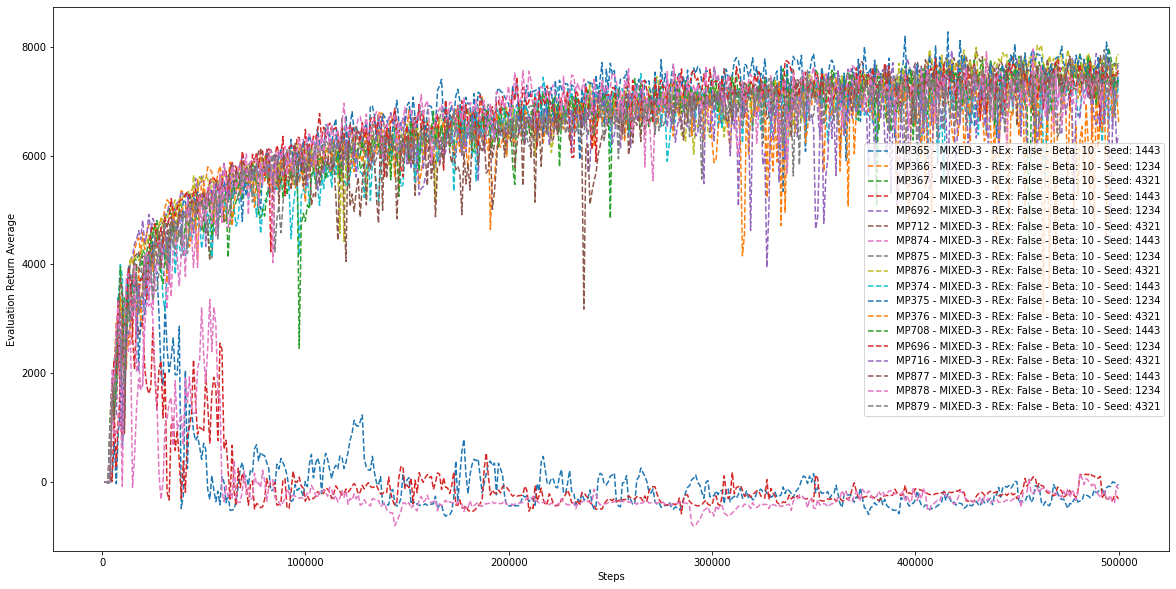

In [32]:
plot_evaluation_returns([
    # Original
    MP365,
    MP366,
    MP367,
    # Hyp re-runs
    MP704,
    MP692,
    MP712,
    # Latest re-runs
    MP874,
    MP875,
    MP876,
    # Original
    MP374,
    MP375,
    MP376,
    # Hyp re-runs
    MP708,
    MP696,
    MP716,
    # Latest re-runs 
    MP877,
    MP878,
    MP879,
])

{'No REx - Original': {'mean': 5071.949113210042, 'std': 3625.1163337579014},
 'No REx - Hyps': {'mean': 5000.112711588542, 'std': 3757.0491867785686},
 'No REx - Latest': {'mean': 5057.4202219645185, 'std': 3683.3064602797153},
 'REx $\\beta=10.0$ - Original': {'mean': 7183.216634114583,
  'std': 402.3888393462827},
 'REx $\\beta=10.0$ - Hyps': {'mean': 7123.473795572917,
  'std': 537.4742896871868},
 'REx $\\beta=10.0$ - Latest': {'mean': 7227.17333984375,
  'std': 101.7091050325149}}

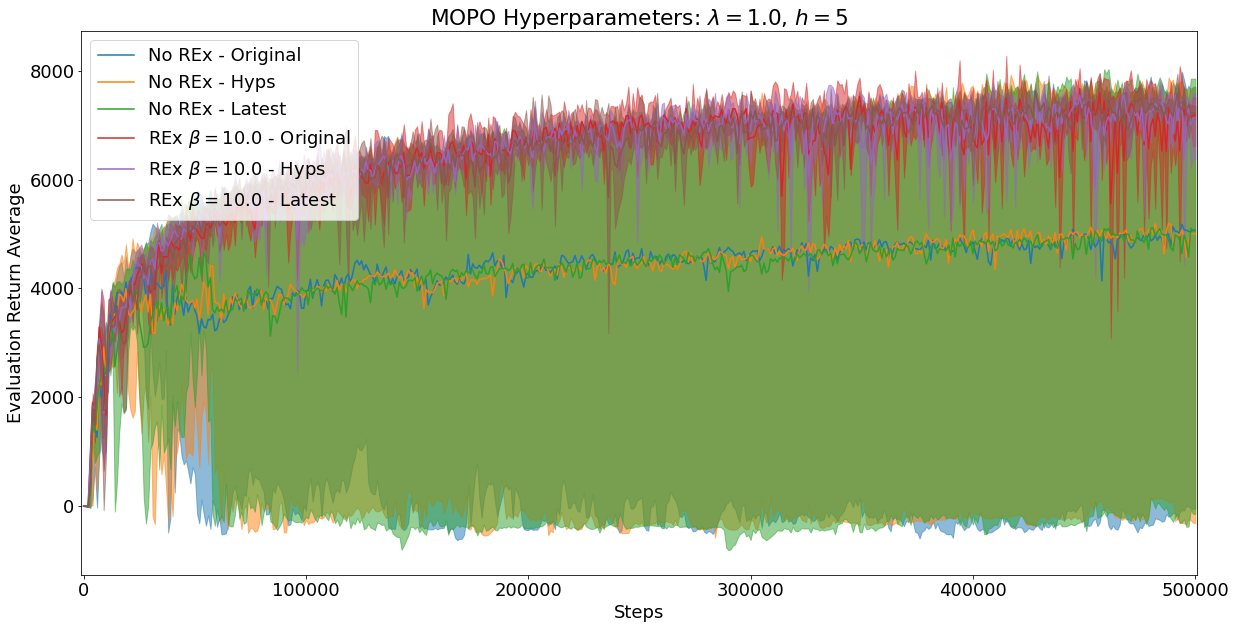

In [47]:
plot_grouped_evaluation_returns([
    ((MP365, MP366, MP367), 'No REx - Original'),
    ((MP704, MP692, MP712), 'No REx - Hyps'),
    ((MP874, MP875, MP876), 'No REx - Latest'),
    ((MP374, MP375, MP376), 'REx $\\beta=10.0$ - Original'),
    ((MP708, MP696, MP716), 'REx $\\beta=10.0$ - Hyps'),
    ((MP877, MP878, MP879), 'REx $\\beta=10.0$ - Latest'),
], title='MOPO Hyperparameters: $\\lambda=1.0$, $h=5$')

## 1 Epoch of Additional Model Training
i.e. the original case

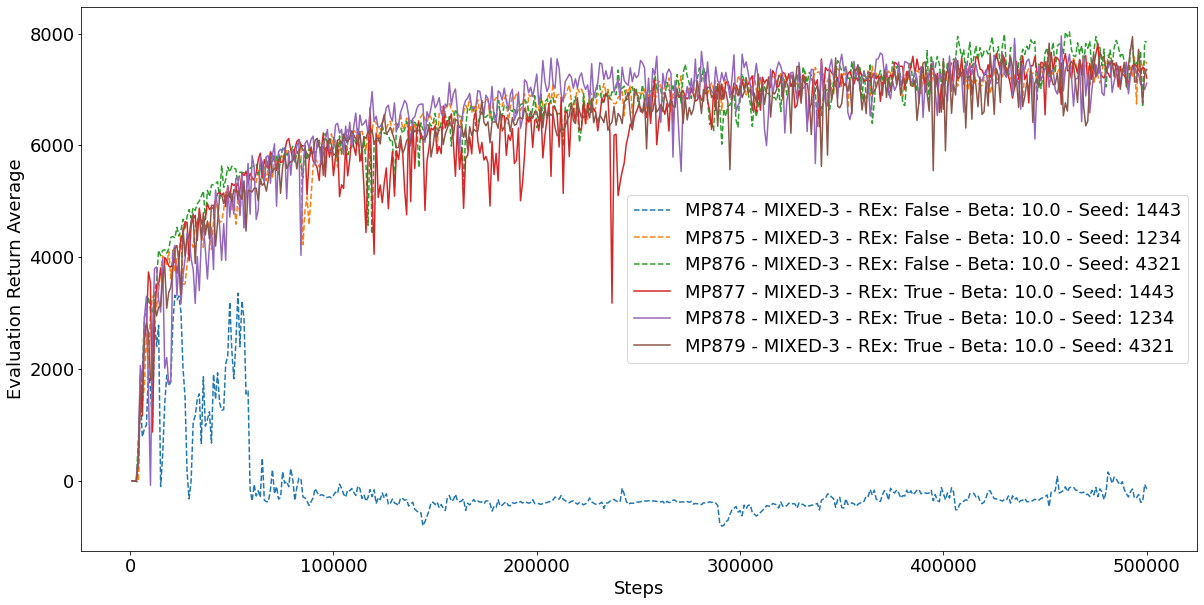

In [48]:
plot_evaluation_returns([
    MP874,
    MP875,
    MP876,
    MP877,
    MP878,
    MP879,
])

## No Additional Model Training

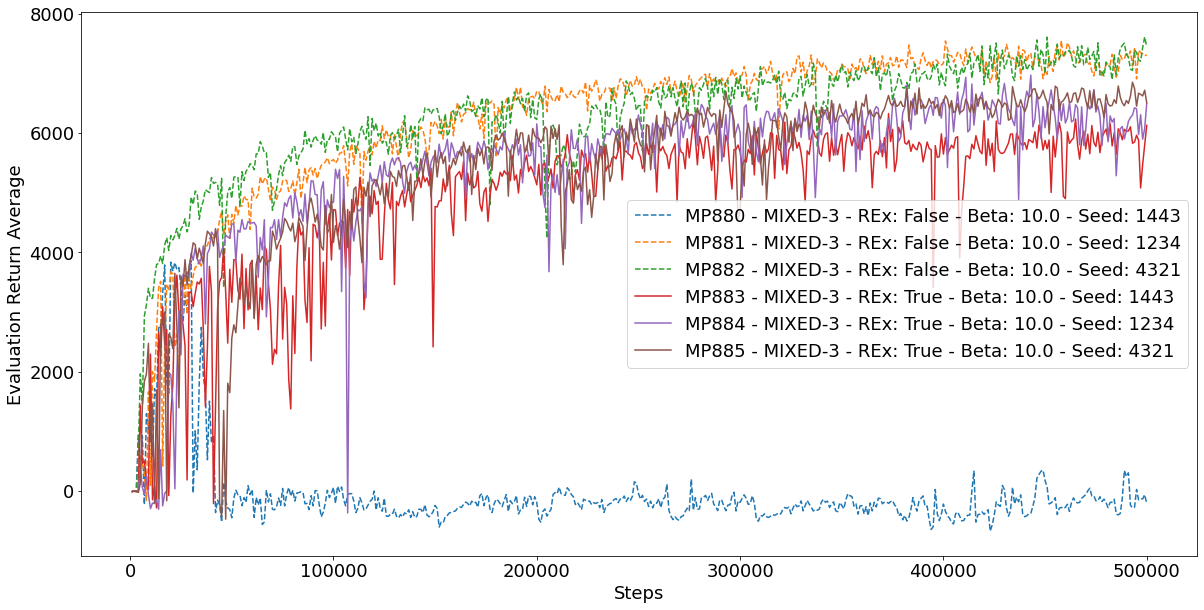

In [49]:
plot_evaluation_returns([
    MP880,
    MP881,
    MP882,
    MP883,
    MP884,
    MP885,
])

{'No REx - Original Model': {'mean': 4848.747792561849,
  'std': 3580.534206190541},
 'No REx - Updated Model': {'mean': 5057.4202219645185,
  'std': 3683.3064602797153},
 'REx - $\\beta=10.0$ - Original Model': {'mean': 6378.40869140625,
  'std': 176.52900702074106},
 'REx - $\\beta=10.0$ - Updated Model': {'mean': 7227.17333984375,
  'std': 101.7091050325149}}

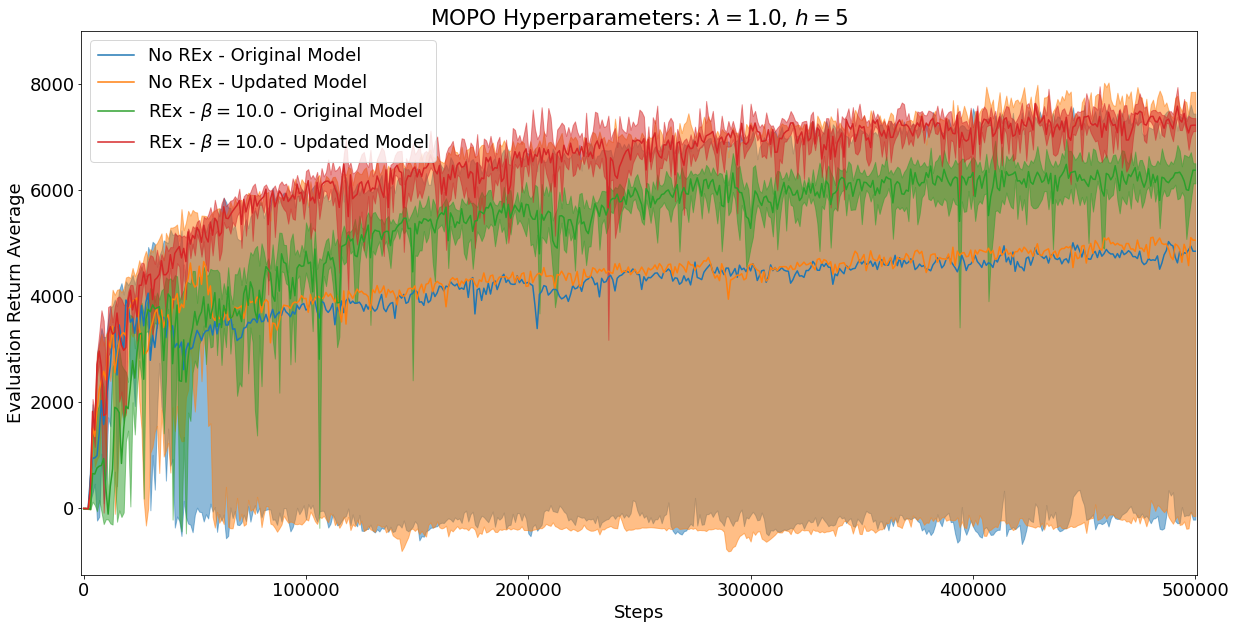

In [53]:
plot_grouped_evaluation_returns([
    ((MP880, MP881, MP882), 'No REx - Original Model'),
    ((MP874, MP875, MP876), 'No REx - Updated Model'),
    ((MP883, MP884, MP885), 'REx - $\\beta=10.0$ - Original Model'),
    ((MP877, MP878, MP879), 'REx - $\\beta=10.0$ - Updated Model'),
], title='MOPO Hyperparameters: $\\lambda=1.0$, $h=5$', ymax=9000)

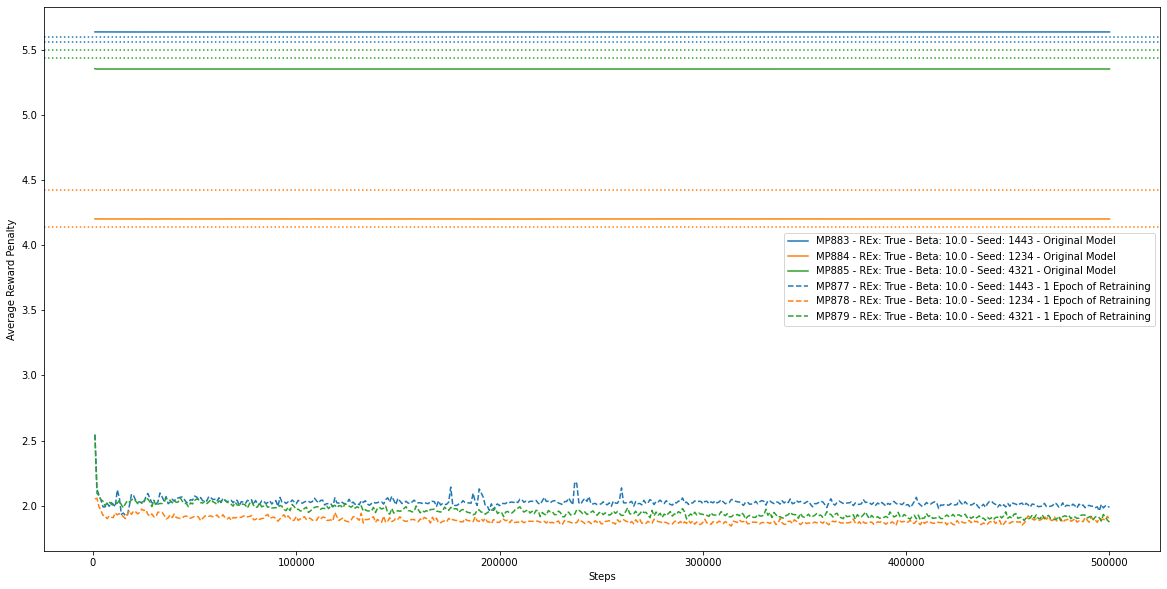

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for exp, rex, beta, col_ind, ls, post_label in [
    (MP883, True, 10.0, 0, '-',  'Original Model'),
    (MP884, True, 10.0, 1, '-',  'Original Model'),
    (MP885, True, 10.0, 2, '-',  'Original Model'),
    (MP877, True, 10.0, 0, '--', '1 Epoch of Retraining'),
    (MP878, True, 10.0, 1, '--', '1 Epoch of Retraining'),
    (MP879, True, 10.0, 2, '--', '1 Epoch of Retraining'),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], c=cols[col_ind], ls=ls, label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed} - {post_label}'
    )
    ax.axhline(exp.max_penalty, c=cols[col_ind], ls=':')
ax.set_xlabel('Steps')
ax.set_ylabel('Average Reward Penalty')
ax.legend()
pass